In [9]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from scipy.ndimage import gaussian_filter

In [17]:
df = pd.read_csv("/Users/vivekhsridhar/Library/Mobile Documents/com~apple~CloudDocs/Documents/Code/decision_geometry/decision_geometry/output/geometry.csv")
df.head()

,time,x,y,angular_difference,direction_chosen
0,10,13.0918,499.407,35.5154,10.1375
1,20,27.2692,498.780,37.5652,10.2636
2,30,40.9735,498.138,39.8124,10.7936
3,40,53.6642,497.571,42.1575,11.1008
4,50,66.5761,497.068,44.8428,11.4567


In [18]:
targets = pd.read_csv("/Users/vivekhsridhar/Library/Mobile Documents/com~apple~CloudDocs/Documents/Code/decision_geometry/decision_geometry/output/targets.csv")
targets.head()

,target_id,target_x,target_y
0,0,685,346
1,1,288,609
2,2,487,730
3,3,495,661
4,4,640,320


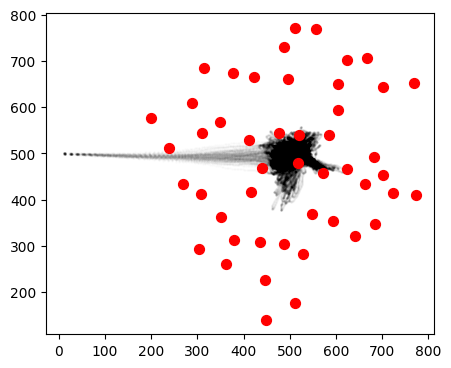

In [19]:
width = 5
height = 5*np.sin(np.pi/3)

fig,ax = plt.subplots(1,1,figsize=(width,height))
ax.scatter(df[' x'], df[' y'], c='black', s=1, alpha=0.01)
ax.scatter(targets[' target_x'], targets[' target_y'], c='red', s=50)
ax.set_aspect('equal')

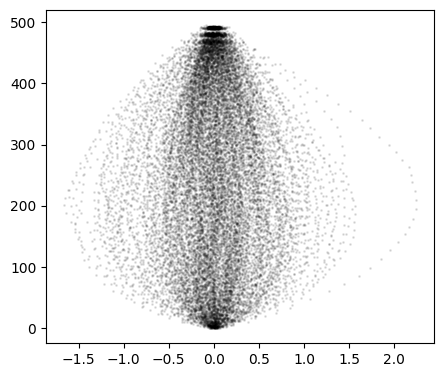

In [5]:
width = 5
height = 5*np.sin(np.pi/3)

plt.figure(figsize=(width,height))
plt.scatter(df[' x'], df[' y'], c='black', s=1, alpha=0.1)

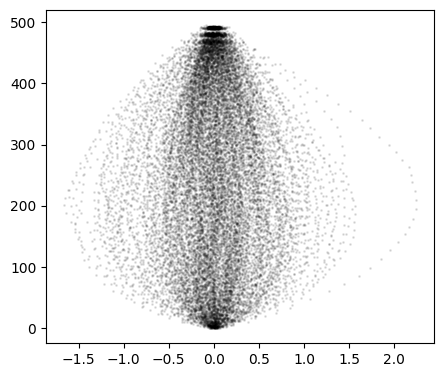

In [6]:
width = 5
height = 5*np.sin(np.pi/3)

plt.figure(figsize=(width,height))
plt.scatter(df[' x'], df[' y'], c='black', s=1, alpha=0.1)

### If number of options is two

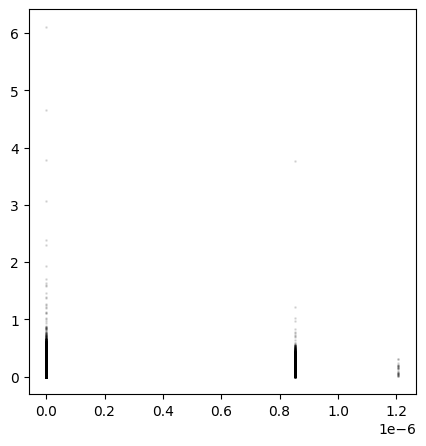

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(df[' angular_difference'], df[' direction_chosen'], c='black', s=1, alpha=0.1)

/var/folders/ng/l4j590g95vl5r33ctw59y6cr0000gn/T/ipykernel_67332/508651573.py:29: RuntimeWarning: invalid value encountered in divide
  heatmap_normalized = heatmap / heatmap.max(axis=1, keepdims=True)


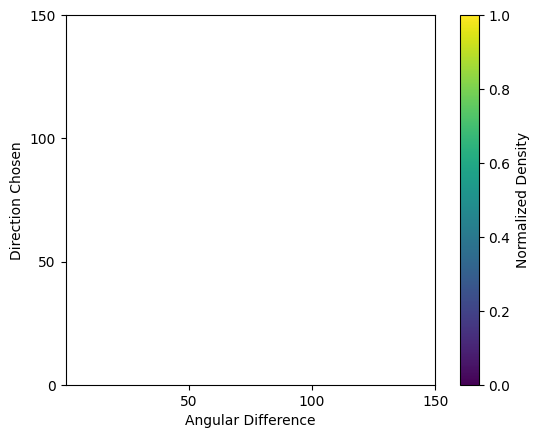

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Extract the variables
time = df['time'].values
x = df[' angular_difference'].values
y = df[' direction_chosen'].values

# Define the number of bins for the heatmap
x_bins = 50
y_bins = 50

# Create bins for x and y
xedges = np.linspace(x.min(), x.max(), x_bins + 1)
yedges = np.linspace(y.min(), y.max(), y_bins + 1)

# Initialize the 2D histogram
heatmap = np.zeros((x_bins, y_bins))

# Accumulate counts in 2D bins over time
for i in range(len(time)):
    x_idx = np.digitize(x[i], xedges) - 1
    y_idx = np.digitize(y[i], yedges) - 1
    if 0 <= x_idx < x_bins and 0 <= y_idx < y_bins:
        heatmap[x_idx, y_idx] += 1

# Normalize the heatmap by the maximum count within each column
heatmap_normalized = heatmap / heatmap.max(axis=1, keepdims=True)
heatmap_normalized = np.nan_to_num(heatmap_normalized)  # Handle division by zero

# Plotting the normalized heatmap using matplotlib
plt.imshow(heatmap_normalized.T, origin='lower', cmap='viridis', 
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xticks([50,100,150])
plt.yticks([0,50,100,150])
plt.colorbar(label='Normalized Density')
plt.xlabel('Angular Difference')
plt.ylabel('Direction Chosen')
plt.savefig('/Users/vivekhsridhar/Library/Mobile Documents/com~apple~CloudDocs/Documents/Code/decision_geometry/decision_geometry/output/Figures/2_post_bifurcation_angles_simulation.png', format='png', dpi=300)

/var/folders/ng/l4j590g95vl5r33ctw59y6cr0000gn/T/ipykernel_67332/4133301721.py:25: RuntimeWarning: invalid value encountered in divide
  heatmap_normalized = heatmap / heatmap.max(axis=1, keepdims=True)


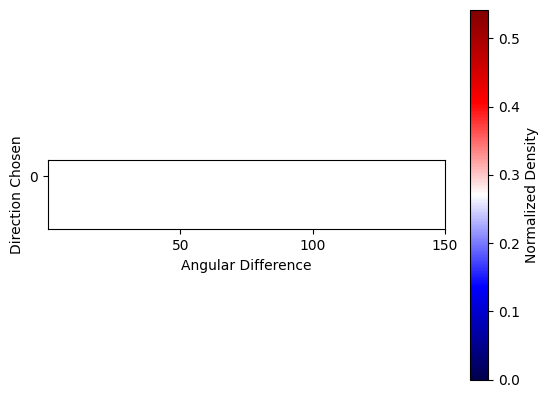

In [9]:
# Extract the variables
time = df['time'].values
x = df[' angular_difference'].values
y = df[' direction_chosen'].values

# Define the number of bins for the heatmap
x_bins = 50
y_bins = 50

# Create bins for x and y
xedges = np.linspace(x.min(), x.max(), x_bins + 1)
yedges = np.linspace(y.min(), y.max(), y_bins + 1)

# Initialize the 2D histogram
heatmap = np.zeros((x_bins, y_bins))

# Accumulate counts in 2D bins over time
for i in range(len(time)):
    x_idx = np.digitize(x[i], xedges) - 1
    y_idx = np.digitize(y[i], yedges) - 1
    if 0 <= x_idx < x_bins and 0 <= y_idx < y_bins:
        heatmap[x_idx, y_idx] += 1

# Normalize the heatmap by the maximum count within each column
heatmap_normalized = heatmap / heatmap.max(axis=1, keepdims=True)
heatmap_normalized = np.nan_to_num(heatmap_normalized)  # Handle division by zero

# Apply Gaussian blur
heatmap_smooth = gaussian_filter(heatmap_normalized, sigma=1.0)

# Define the colormap normalization to ensure that the lowest color corresponds to zero density
norm = mcolors.Normalize(vmin=0, vmax=np.max(heatmap_smooth))

# Plotting the smoothed heatmap using matplotlib
plt.imshow(heatmap_smooth.T, origin='lower', cmap='seismic', norm=norm,
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xticks([50,100,150])
plt.yticks([0,50,100,150])
plt.colorbar(label='Normalized Density')
plt.xlabel('Angular Difference')
plt.ylabel('Direction Chosen')
plt.ylim(min(yedges[0], -20), yedges[-1])  # Adjust ylim to extend below y=0
plt.savefig('/Users/vivekhsridhar/Library/Mobile Documents/com~apple~CloudDocs/Documents/Code/decision_geometry/decision_geometry/output/Figures/2_post_bifurcation_angles_simulation2.png', format='png', dpi=300)

### Old method

In [10]:
nPosts = 2    # spin model: nPosts=2/3 => total_agents = 6/60; temperature = 0.05/0.01;
df = pd.read_csv("/Users/vivekhsridhar/Library/Mobile Documents/com~apple~CloudDocs/Documents/Code/decision_geometry/decision_geometry/output/geometry.csv")
df.head()

,time,x,y,angular_difference,direction_chosen
0,10,0.007009,491.648,8.537740e-07,0.218846
1,20,-0.021983,480.313,0.000000e+00,0.087921
2,30,-0.039516,467.601,0.000000e+00,0.107820
3,40,-0.068220,456.164,0.000000e+00,0.126577
4,50,-0.108038,443.941,0.000000e+00,0.149023


In [11]:
xs = df[' x'] / 100
ys = (df[' y'] - 500) / 100

if nPosts == 2:
    post0_x = 5.0*np.cos(np.pi/6)
    post0_y = -5.0*np.sin(np.pi/6)

    post1_x = 5.0*np.cos(np.pi/6)
    post1_y = 5.0*np.sin(np.pi/6)
else:
    post0_x = 5.0*np.cos(2*np.pi/9)
    post0_y = -5.0*np.sin(2*np.pi/9)

    post1_x = 5.0
    post1_y = 0.0
    
    post2_x = 5.0*np.cos(2*np.pi/9)
    post2_y = 5.0*np.sin(2*np.pi/9)

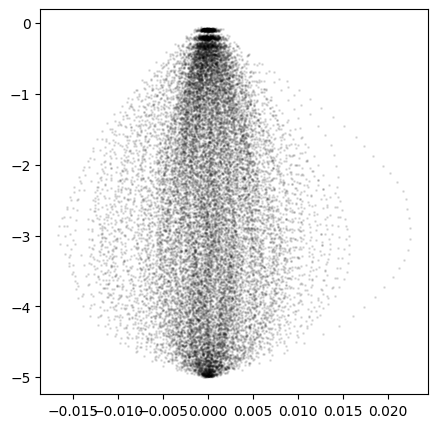

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(xs, ys, c='black', s=1, alpha=0.1)
# plt.savefig('/Users/vivekhsridhar/Documents/Code/Python/fly-matrix/figures/trajectories_' + str(nPosts) + '_simulation.png', format='png', dpi=300)

AttributeError: QuadMesh.set() got an unexpected keyword argument 'normed'

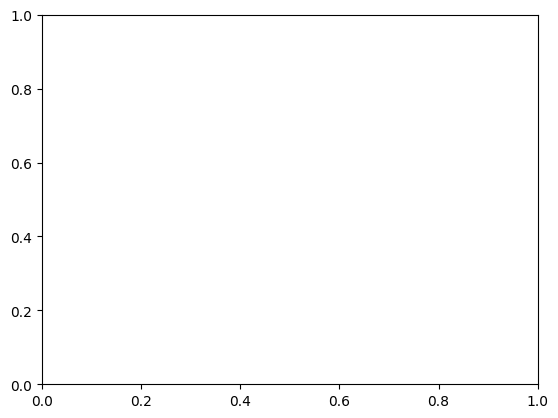

In [13]:
nbins = 500
h,xedge,yedge,image = plt.hist2d(xs,ys, bins=nbins, normed=True)

if nPosts == 2:
    img = np.flipud(np.rot90(cv2.GaussianBlur(h,(101,101),0)))
else:
    img = np.flipud(np.rot90(cv2.GaussianBlur(h,(101,101),0)))

In [ ]:
for i in range(0,nbins):
    max_val = np.max(img[:,i])
    img[:,i] = img[:,i]/max_val

In [ ]:
xs=[]
ys=[]
import scipy.signal

if nPosts == 2:
    for i in range(1,nbins):
        a = scipy.signal.find_peaks(img[:,i], height=0.5)[0]
        for j in range(0,len(a)):
            xs.append(i*post0_x/nbins)
            ys.append(a[j]*(post0_y-post1_y)/nbins + post1_y)
else:
    for i in range(1,nbins):
        a = scipy.signal.find_peaks(img[:,i], height=0.5)[0]
        for j in range(0,len(a)):
            xs.append(i*post1_x/nbins)
            ys.append(a[j]*(post0_y-post2_y)/nbins + post2_y)

In [ ]:
def get_duplicates(x): 
    _size = len(x) 
    repeated = [] 
    for i in range(_size): 
        k = i + 1
        for j in range(k, _size): 
            if x[i] == x[j] and x[i] not in repeated: 
                repeated.append(x[i]) 
    return repeated 

In [ ]:
if nPosts == 2:
    bifurcation_x = np.min(np.where(xs == np.min(get_duplicates(xs))))-1
    plt.imshow(img, extent=[0,post1_x,post0_y,post1_y])
else:
    plt.imshow(img, extent=[0,post1_x,post0_y,post2_y])
#plt.scatter(xs,ys, s=1, c='black')

plt.savefig('/Users/vivekhsridhar/Documents/Code/Python/fly-matrix/figures/' + str(nPosts) + '_post_bifurcation_tracks_simulation.png', format='png', dpi=300)

In [ ]:
bifurcation_pt = post1_x*bifurcation_x/nbins,ys[bifurcation_x]

vec0 = post0_x-bifurcation_pt[0], post0_y-bifurcation_pt[1]
if nPosts == 2:
    vec1 = post1_x-bifurcation_pt[0], post1_y-bifurcation_pt[1] 
else:
    vec1 = post2_x-bifurcation_pt[0], post2_y-bifurcation_pt[1]

vec0 = vec0 / np.linalg.norm(vec0)
vec1 = vec1 / np.linalg.norm(vec1)

In [ ]:
np.arccos(vec0.dot(vec1))*180/np.pi

In [ ]:
app_ang = df[' theta']
direc = np.arctan2(df[' dir_y'],df[' dir_x'])

In [ ]:
plt.scatter(app_ang, direc, c='black', s=1, alpha=0.1)

In [ ]:
nbins = 500
h,xedge,yedge,image = plt.hist2d(app_ang,direc, bins=nbins, normed=True)
img = np.flipud(np.rot90(cv2.GaussianBlur(h,(301,151),0)))

In [ ]:
for i in range(0,nbins):
    max_val = np.max(img[:,i])
    img[:,i] = img[:,i]/max_val

In [ ]:
angs=[]
dirs=[]
import scipy.signal
for i in range(5,nbins):
    a = scipy.signal.find_peaks(img[:,i], height=0.1)[0]
    for j in range(0,len(a)):
        angs.append(i*(180-60)/nbins + 60)
        dirs.append(a[j]*2*180/nbins - 180)

In [ ]:
bifurcation_x = np.min(np.where(angs == np.min(get_duplicates(angs))))-1

plt.imshow(np.flipud(img), extent=[60,180,-180,180], aspect=0.4)
plt.xticks([60,90,120,150,180])
plt.yticks([-180,-120,-60,0,60,120,180])
plt.xlabel('Angular disagreement (degrees)')
plt.ylabel('Direction (degrees)')
# plt.savefig('/Users/vivekhsridhar/Documents/Code/Python/fly-matrix/figures/' + str(nPosts) + '_post_bifurcation_angles_simulation.png', format='png', dpi=300)